# 1.Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# 2.Load the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import files
expenseData = files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data.csv


# 3.Analyze the data (Statistical Summary)

In [ ]:
import io as io
data = pd.read_csv(io.BytesIO(expenseData['Inc_Exp_Data.csv']),index_col=None)

In [ ]:
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


# 4.What is the Mean Expense of a Household?

In [ ]:
data['Mthly_HH_Expense'].mean()

18818.0

# 5.What is the Median Household Expense?

In [ ]:
data['Mthly_HH_Expense'].median()

15500.0

# 6.What is the Monthly Expense for most of the Households?

In [ ]:
ExpenseCount = pd.crosstab(index = data['Mthly_HH_Expense'], columns='count');
ExpenseCount.reset_index(inplace=True);
ExpenseCount['count'].max()

ExpenseCount[ExpenseCount['count'] == ExpenseCount['count'].max()]

col_0,Mthly_HH_Expense,count
18,25000,8


# 7.Plot the Histogram to count the Highest qualified member

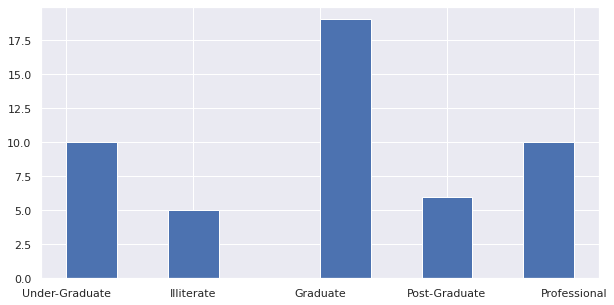

In [ ]:
data['Highest_Qualified_Member'].hist(figsize=(10,5))

# 8.Calculate IQR(difference between 75% and 25% quartile) for Monthly Household Income and Expense

IQR for income 26825.0
IQR for expense 15000.0


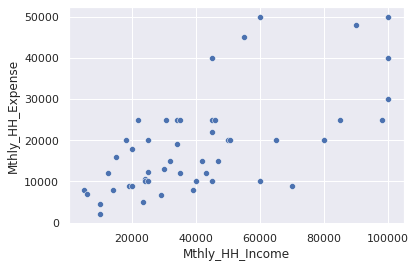

In [ ]:
iqr_i = data['Mthly_HH_Income'].quantile(0.75)- data['Mthly_HH_Income'].quantile(0.25)
print('IQR for income',iqr_i);

iqr_e = data['Mthly_HH_Expense'].quantile(0.75)- data['Mthly_HH_Expense'].quantile(0.25)
print('IQR for expense',iqr_e);

sns.scatterplot(x="Mthly_HH_Income",y= "Mthly_HH_Expense", data= data)

# 9.Calculate Standard Deviation for first 4 columns.

In [ ]:
pd.DataFrame(data.iloc[:,0:5].std().to_frame().transpose())

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


# 10.Calculate Variance for first 3 columns.

In [ ]:
pd.DataFrame(data.iloc[:,0:4].var().to_frame()).transpose()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07


# 11.Calculate the count of Highest qualified member.

In [ ]:
qualifiedNum = pd.crosstab(index=data['Highest_Qualified_Member'], columns='count');
qualifiedNum.reset_index(inplace=True);
qualifiedNum
qualifiedNum[qualifiedNum['count'] == qualifiedNum['count'].max()]

col_0,Highest_Qualified_Member,count
0,Graduate,19


# 12.Plot the Histogram to count the No_of_Earning_Members

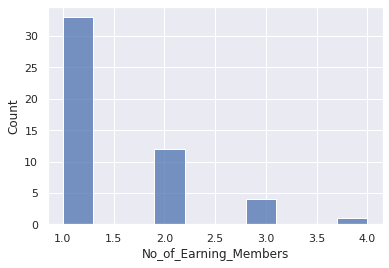

In [ ]:
sns.histplot(x=data['No_of_Earning_Members'],kde=False,bins= 10)